In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/NBA Predictions" #for Google collab

'Bad NBA Playoffs Predictions.ipynb'
 DataScraping.ipynb
 Model
'NBA Playoff Predictions Report.gdoc'
'NBA Playoffs Data'
'NBA Team Data'
'NBA Year Data'
'NBA Year Data Less'
'Playoffs vs Non-playoffs Data Analysis.ipynb'
'Playoffs vs Non-playoffs Individual Player Data Analysis .ipynb'


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import os, glob
import numpy as np

### First, import and checkout some sample data

In [4]:
sample_df = pd.read_csv("/content/drive/My Drive/NBA Predictions/NBA Team Data/TOR/TOR_team_per_game_2019.csv")
sample_df

Unnamed: 0                      Age   G  GS  ...  STL  BLK  TOV   PF  PTS/G
0            0       Kawhi Leonard   27  60  60  ...  1.8  0.4  2.0  1.5   26.6
1            1          Kyle Lowry   32  65  65  ...  1.4  0.5  2.8  2.6   14.2
2            2       Pascal Siakam   24  80  79  ...  0.9  0.7  1.9  3.0   16.9
3            3         Danny Green   31  80  80  ...  0.9  0.7  0.9  2.1   10.3
4            4       Fred VanVleet   24  64  28  ...  0.9  0.3  1.3  1.7   11.0
5            5         Serge Ibaka   29  74  51  ...  0.4  1.4  1.5  2.9   15.0
6            6          Marc Gasol   34  26  19  ...  0.9  0.9  1.4  2.7    9.1
7            7          OG Anunoby   21  67   6  ...  0.7  0.3  0.8  2.1    7.0
8            8          Jeremy Lin   30  23   3  ...  0.4  0.3  1.1  2.1    7.0
9            9   Jonas Valančiūnas   26  30  10  ...  0.4  0.8  1.3  2.7   12.8
10          10       Norman Powell   25  60   3  ...  0.7  0.2  1.1  1.6    8.6
11          11        Delon Wright   26  49   2  ...  0.9  0.3  0.8  1.1    6.9
12          12          C.J. Miles   31  40   1  ...  0.5  0.3  0.5  1.6    5.5
13          13       Patrick McCaw   23  26   1  ...  0.8  0.1  0.5  1.4    2.7
14          14         Jodie Meeks   31   8   0  ...  0.1  0.1  0.3  0.6    6.4
15          15         Greg Monroe   28  38   2  ...  0.3  0.2  0.8  1.6    4.8
16          16       Eric Moreland   27   4   0  ...  0.3  0.3  1.3  2.0    1.8
17          17       Lorenzo Brown   28  26   0  ...  0.5  0.2  0.6  0.8    2.1
18          18      Malcolm Miller   25  10   0  ...  0.1  0.1  0.1  0.5    3.5
19          19       Chris Boucher   26  28   0  ...  0.2  0.9  0.3  1.1    3.3
20          20  Malachi Richardson   23  22   0  ...  0.0  0.0  0.4  0.6    1.4
21          21         Jordan Loyd   25  12   0  ...  0.0  0.0  0.2  0.4    2.4

[22 rows x 28 columns]

Drop the numbers on the left column

In [5]:
sample_df = sample_df.drop(sample_df.columns[0], axis = 1)
sample_df

Age   G  GS    MP   FG  ...  AST  STL  BLK  TOV   PF  PTS/G
0        Kawhi Leonard   27  60  60  34.0  9.3  ...  3.3  1.8  0.4  2.0  1.5   26.6
1           Kyle Lowry   32  65  65  34.0  4.7  ...  8.7  1.4  0.5  2.8  2.6   14.2
2        Pascal Siakam   24  80  79  31.9  6.5  ...  3.1  0.9  0.7  1.9  3.0   16.9
3          Danny Green   31  80  80  27.7  3.7  ...  1.6  0.9  0.7  0.9  2.1   10.3
4        Fred VanVleet   24  64  28  27.5  3.8  ...  4.8  0.9  0.3  1.3  1.7   11.0
5          Serge Ibaka   29  74  51  27.2  6.3  ...  1.3  0.4  1.4  1.5  2.9   15.0
6           Marc Gasol   34  26  19  24.9  3.3  ...  3.9  0.9  0.9  1.4  2.7    9.1
7           OG Anunoby   21  67   6  20.2  2.7  ...  0.7  0.7  0.3  0.8  2.1    7.0
8           Jeremy Lin   30  23   3  18.8  2.5  ...  2.2  0.4  0.3  1.1  2.1    7.0
9    Jonas Valančiūnas   26  30  10  18.8  5.0  ...  1.0  0.4  0.8  1.3  2.7   12.8
10       Norman Powell   25  60   3  18.8  3.2  ...  1.5  0.7  0.2  1.1  1.6    8.6
11        Delon Wright   26  49   2  18.3  2.6  ...  2.2  0.9  0.3  0.8  1.1    6.9
12          C.J. Miles   31  40   1  14.1  1.8  ...  0.6  0.5  0.3  0.5  1.6    5.5
13       Patrick McCaw   23  26   1  13.2  0.9  ...  1.0  0.8  0.1  0.5  1.4    2.7
14         Jodie Meeks   31   8   0  13.0  2.6  ...  1.0  0.1  0.1  0.3  0.6    6.4
15         Greg Monroe   28  38   2  11.1  1.9  ...  0.4  0.3  0.2  0.8  1.6    4.8
16       Eric Moreland   27   4   0   9.5  0.8  ...  1.0  0.3  0.3  1.3  2.0    1.8
17       Lorenzo Brown   28  26   0   8.2  0.9  ...  1.1  0.5  0.2  0.6  0.8    2.1
18      Malcolm Miller   25  10   0   6.7  1.1  ...  0.1  0.1  0.1  0.1  0.5    3.5
19       Chris Boucher   26  28   0   5.8  1.2  ...  0.1  0.2  0.9  0.3  1.1    3.3
20  Malachi Richardson   23  22   0   4.7  0.4  ...  0.0  0.0  0.0  0.4  0.6    1.4
21         Jordan Loyd   25  12   0   4.6  0.7  ...  0.5  0.0  0.0  0.2  0.4    2.4

[22 rows x 27 columns]

Perhaps we should find the averages for the team stats minus the first four rows

In [6]:
print(len(sample_df.columns))
print(sample_df.columns)

27
Index([' ', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS/G'],
      dtype='object')


In [7]:
sample_df_avg = sample_df.iloc[:,5:].mean(skipna=True, axis = 0)
sample_df_avg

FG       2.995455
FGA      6.427273
FG%      0.445545
3P       0.895455
3PA      2.422727
3P%      0.370091
2P       2.109091
2PA      3.990909
2P%      0.476273
eFG%     0.524136
FT       1.268182
FTA      1.568182
FT%      0.812476
ORB      0.731818
DRB      2.750000
TRB      3.468182
AST      1.822727
STL      0.595455
BLK      0.409091
TOV      0.995455
PF       1.668182
PTS/G    8.150000
dtype: float64

Let's see the resulting data of the most recent season (2018-2019)

In [0]:
def build_team_data_blueprint():
  blueprint = {}
  for folder in os.listdir("/content/drive/My Drive/NBA Predictions/NBA Team Data/"):
    blueprint[folder] = "N/A"
  return blueprint

In [0]:
# def build_year_data_blueprint():
#   blueprint = {}
#   for folder in os.listdir("/content/drive/My Drive/NBA Predictions/NBA Year Data/"):
#     blueprint[folder] = "N/A"
#   return blueprint

In [0]:
def build_stats_for_team(team):
  team_and_opponent_data = build_team_data_blueprint()
  team_per_game_data = build_team_data_blueprint()
  for folder in os.listdir("/content/drive/My Drive/NBA Predictions/NBA Team Data/"):
    if folder.find(team) != -1:
      for file in os.listdir("/content/drive/My Drive/NBA Predictions/NBA Team Data/" + folder + '/'):
        year = file[-8:-4]
        if file.find('team_and_opponent') != -1:
          #remove the rank on the right column
          dat = pd.read_csv("/content/drive/My Drive/NBA Predictions/NBA Team Data/" + folder + '/' + file)
          dat = dat.drop(dat.columns[0], axis = 1)
          team_and_opponent_data[year] = dat
          continue
        elif file.find('team_per_game') != -1:
          #remove the rank on the right column
          dat = pd.read_csv("/content/drive/My Drive/NBA Predictions/NBA Team Data/" + folder + '/' + file)
          dat = dat.drop(dat.columns[0], axis = 1)
          team_per_game_data[year] = dat
          continue
  return team_and_opponent_data, team_per_game_data
      

Following function will aggregate stats for a given nba year

In [0]:
def build_stats_for_year(year):
  year_team_and_opponent_df = pd.DataFrame()
  year_team_per_game_df = pd.DataFrame()
  for file in os.listdir("/content/drive/My Drive/NBA Predictions/NBA Year Data/" + str(year) + '-' + str(year+1)):
      if file.find(str(year+1)) != -1:
        if file.find('team_and_opponent') != -1:
          temp_df = pd.read_csv("/content/drive/My Drive/NBA Predictions/NBA Year Data/" + str(year) + '-' + str(year+1) + '/'+ file)
          temp_df = temp_df.drop(temp_df.columns[0], axis = 1)
          year_team_and_opponent_df = year_team_and_opponent_df.append(temp_df)
        elif file.find('team_per_game') != -1:
          year_team_per_game_df = year_team_per_game_df.append(pd.read_csv("/content/drive/My Drive/NBA Predictions/NBA Year Data/" + str(year) + '-' + str(year+1) + '/'+ file))
  return year_team_and_opponent_df, year_team_per_game_df
      

In [0]:
team_and_opponent_1980, team_per_game_1980 = build_stats_for_year(1980)
avg_team_stats_1980 = team_and_opponent_1980.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1981, team_per_game_1981 = build_stats_for_year(1981)
avg_team_stats_1981 = team_and_opponent_1981.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1982, team_per_game_1982 = build_stats_for_year(1982)
avg_team_stats_1982 = team_and_opponent_1982.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1983, team_per_game_1983 = build_stats_for_year(1983)
avg_team_stats_1983 = team_and_opponent_1983.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1984, team_per_game_1984 = build_stats_for_year(1984)
avg_team_stats_1984 = team_and_opponent_1984.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1985, team_per_game_1985 = build_stats_for_year(1985)
avg_team_stats_1985 = team_and_opponent_1985.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1986, team_per_game_1986 = build_stats_for_year(1986)
avg_team_stats_1986 = team_and_opponent_1986.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1987, team_per_game_1987 = build_stats_for_year(1987)
avg_team_stats_1987 = team_and_opponent_1987.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1988, team_per_game_1988 = build_stats_for_year(1988)
avg_team_stats_1988 = team_and_opponent_1988.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1989, team_per_game_1989 = build_stats_for_year(1989)
avg_team_stats_1989 = team_and_opponent_1989.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1990, team_per_game_1990 = build_stats_for_year(1990)
avg_team_stats_1990 = team_and_opponent_1990.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1991, team_per_game_1991 = build_stats_for_year(1991)
avg_team_stats_1991 = team_and_opponent_1991.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1992, team_per_game_1992 = build_stats_for_year(1992)
avg_team_stats_1992 = team_and_opponent_1992.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1993, team_per_game_1993 = build_stats_for_year(1993)
avg_team_stats_1993 = team_and_opponent_1993.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1994, team_per_game_1994 = build_stats_for_year(1994)
avg_team_stats_1994 = team_and_opponent_1994.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1995, team_per_game_1995 = build_stats_for_year(1995)
avg_team_stats_1995 = team_and_opponent_1995.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1996, team_per_game_1996 = build_stats_for_year(1996)
avg_team_stats_1996 = team_and_opponent_1996.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1997, team_per_game_1997 = build_stats_for_year(1997)
avg_team_stats_1997 = team_and_opponent_1997.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1998, team_per_game_1998 = build_stats_for_year(1998)
avg_team_stats_1998 = team_and_opponent_1998.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_1999, team_per_game_1999 = build_stats_for_year(1999)
avg_team_stats_1999 = team_and_opponent_1999.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2000, team_per_game_2000 = build_stats_for_year(2000)
avg_team_stats_2000 = team_and_opponent_2000.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2001, team_per_game_2001 = build_stats_for_year(2001)
avg_team_stats_2001 = team_and_opponent_2001.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2002, team_per_game_2002 = build_stats_for_year(2002)
avg_team_stats_2002 = team_and_opponent_2002.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2003, team_per_game_2003 = build_stats_for_year(2003)
avg_team_stats_2003 = team_and_opponent_2003.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2004, team_per_game_2004 = build_stats_for_year(2004)
avg_team_stats_2004 = team_and_opponent_2004.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2005, team_per_game_2005 = build_stats_for_year(2005)
avg_team_stats_2005 = team_and_opponent_2005.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2006, team_per_game_2006 = build_stats_for_year(2006)
avg_team_stats_2006 = team_and_opponent_2006.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2007, team_per_game_2007 = build_stats_for_year(2007)
avg_team_stats_2007 = team_and_opponent_2007.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2008, team_per_game_2008 = build_stats_for_year(2008)
avg_team_stats_2008 = team_and_opponent_2008.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2009, team_per_game_2009 = build_stats_for_year(2009)
avg_team_stats_2009 = team_and_opponent_2009.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2010, team_per_game_2010 = build_stats_for_year(2010)
avg_team_stats_2010 = team_and_opponent_2010.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2011, team_per_game_2011 = build_stats_for_year(2011)
avg_team_stats_2011 = team_and_opponent_2011.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2012, team_per_game_2012 = build_stats_for_year(2012)
avg_team_stats_2012 = team_and_opponent_2012.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2013, team_per_game_2013 = build_stats_for_year(2013)
avg_team_stats_2013 = team_and_opponent_2013.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2014, team_per_game_2014 = build_stats_for_year(2014)
avg_team_stats_2014 = team_and_opponent_2014.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2015, team_per_game_2015 = build_stats_for_year(2015)
avg_team_stats_2015 = team_and_opponent_2015.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2016, team_per_game_2016 = build_stats_for_year(2016)
avg_team_stats_2016 = team_and_opponent_2016.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2017, team_per_game_2017 = build_stats_for_year(2017)
avg_team_stats_2017 = team_and_opponent_2017.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2018, team_per_game_2018 = build_stats_for_year(2018)
avg_team_stats_2018 = team_and_opponent_2018.iloc[::8,3:].astype('float').mean()

In [0]:
team_and_opponent_2019, team_per_game_2019 = build_stats_for_year(2019)
avg_team_stats_2019 = team_and_opponent_2019.iloc[::8,3:].astype('float').mean()

In [0]:
#print(team_and_opponent_1980)

Sample data

In [102]:
team_and_opponent_1981

G     MP     FG    FGA  ...     STL     BLK     TOV     PF    PTS
0         Team  82.0  19780   3657   7334  ...     652     568    1452   2014   9180
1       Team/G   NaN  241.2   44.6   89.4  ...     8.0     6.9    17.7   24.6  112.0
2      Lg Rank   NaN     15      5      8  ...      15       2      12      5      4
3    Year/Year   NaN   0.0%   2.1%   3.3%  ...   -4.5%   -4.4%   -7.9%   1.2%   1.9%
4     Opponent  82.0  19780   3490   7429  ...     681     367    1432   2240   8657
..         ...   ...    ...    ...    ...  ...     ...     ...     ...    ...    ...
3    Year/Year   NaN  -0.3%  -2.5%  -1.3%  ...  -18.8%    3.4%  -16.3%  -0.4%  -3.8%
4     Opponent  82.0  19880   3150   6709  ...     578     434    1444   2179   8237
5   Opponent/G   NaN  242.4   38.4   81.8  ...     7.0     5.3    17.6   26.6  100.5
6      Lg Rank   NaN      1      1      1  ...       1      12      11      8      1
7    Year/Year   NaN  -0.3%  -7.4%  -2.3%  ...  -22.7%  -21.8%  -14.3%  -1.4%  -7.0%

[304 rows x 24 columns]

Now find average stats for the year.

In [103]:
team_and_opponent_1981.iloc[0,1]

82.0

In [104]:
print(avg_team_stats_1981)


FG     3407.263158
FGA    7117.578947
FG%       0.478184
3P      172.394737
3PA     521.815789
3P%       0.288289
2P     3234.868421
2PA    6595.763158
2P%       0.489711
FT     1696.526316
FTA    2258.894737
FT%       0.750789
ORB    1119.789474
DRB    2399.184211
TRB    3518.973684
AST    2004.184211
STL     686.473684
BLK     435.210526
TOV    1381.210526
PF     2031.078947
PTS    8683.447368
dtype: float64


Now divide by the number of games (due to lock out seasons) from the avg_team_stats_df

In [105]:
team_and_opponent_1980.iloc[0,1]

82.0

Check how to find "key" inside the pandas data series. 'FG' corresponds to the key, '0'corresponds to the "Team" row

In [106]:
avg_team_stats_1980['FG']

3347.6052631578946

In [0]:
# example: get the average number of field goals from 1980 to 2019 across all teams
def get_per_game_data_for_year(stat):
  avg_stat = []
  avg_stat.append(avg_team_stats_1980[stat]/team_and_opponent_1980.iloc[0,1])
  avg_stat.append(avg_team_stats_1981[stat]/team_and_opponent_1981.iloc[0,1])
  avg_stat.append(avg_team_stats_1982[stat]/team_and_opponent_1982.iloc[0,1])
  avg_stat.append(avg_team_stats_1983[stat]/team_and_opponent_1983.iloc[0,1])
  avg_stat.append(avg_team_stats_1984[stat]/team_and_opponent_1984.iloc[0,1])
  avg_stat.append(avg_team_stats_1985[stat]/team_and_opponent_1985.iloc[0,1])
  avg_stat.append(avg_team_stats_1986[stat]/team_and_opponent_1986.iloc[0,1])
  avg_stat.append(avg_team_stats_1987[stat]/team_and_opponent_1987.iloc[0,1])
  avg_stat.append(avg_team_stats_1988[stat]/team_and_opponent_1988.iloc[0,1])
  avg_stat.append(avg_team_stats_1989[stat]/team_and_opponent_1989.iloc[0,1])
  avg_stat.append(avg_team_stats_1990[stat]/team_and_opponent_1990.iloc[0,1])
  avg_stat.append(avg_team_stats_1991[stat]/team_and_opponent_1991.iloc[0,1])
  avg_stat.append(avg_team_stats_1992[stat]/team_and_opponent_1992.iloc[0,1])
  avg_stat.append(avg_team_stats_1993[stat]/team_and_opponent_1993.iloc[0,1])
  avg_stat.append(avg_team_stats_1994[stat]/team_and_opponent_1994.iloc[0,1])
  avg_stat.append(avg_team_stats_1995[stat]/team_and_opponent_1995.iloc[0,1])
  avg_stat.append(avg_team_stats_1996[stat]/team_and_opponent_1996.iloc[0,1])
  avg_stat.append(avg_team_stats_1997[stat]/team_and_opponent_1997.iloc[0,1])
  avg_stat.append(avg_team_stats_1998[stat]/team_and_opponent_1998.iloc[0,1])
  avg_stat.append(avg_team_stats_1999[stat]/team_and_opponent_1999.iloc[0,1])
  avg_stat.append(avg_team_stats_2000[stat]/team_and_opponent_2000.iloc[0,1])
  avg_stat.append(avg_team_stats_2001[stat]/team_and_opponent_2001.iloc[0,1])
  avg_stat.append(avg_team_stats_2002[stat]/team_and_opponent_2002.iloc[0,1])
  avg_stat.append(avg_team_stats_2003[stat]/team_and_opponent_2003.iloc[0,1])
  avg_stat.append(avg_team_stats_2004[stat]/team_and_opponent_2004.iloc[0,1])
  avg_stat.append(avg_team_stats_2005[stat]/team_and_opponent_2005.iloc[0,1])
  avg_stat.append(avg_team_stats_2006[stat]/team_and_opponent_2006.iloc[0,1])
  avg_stat.append(avg_team_stats_2007[stat]/team_and_opponent_2007.iloc[0,1])
  avg_stat.append(avg_team_stats_2008[stat]/team_and_opponent_2008.iloc[0,1])
  avg_stat.append(avg_team_stats_2009[stat]/team_and_opponent_2009.iloc[0,1])
  avg_stat.append(avg_team_stats_2010[stat]/team_and_opponent_2010.iloc[0,1])
  avg_stat.append(avg_team_stats_2011[stat]/team_and_opponent_2011.iloc[0,1])
  avg_stat.append(avg_team_stats_2012[stat]/team_and_opponent_2012.iloc[0,1])
  avg_stat.append(avg_team_stats_2013[stat]/team_and_opponent_2013.iloc[0,1])
  avg_stat.append(avg_team_stats_2014[stat]/team_and_opponent_2014.iloc[0,1])
  avg_stat.append(avg_team_stats_2015[stat]/team_and_opponent_2015.iloc[0,1])
  avg_stat.append(avg_team_stats_2016[stat]/team_and_opponent_2016.iloc[0,1])
  avg_stat.append(avg_team_stats_2017[stat]/team_and_opponent_2017.iloc[0,1])
  avg_stat.append(avg_team_stats_2018[stat]/team_and_opponent_2018.iloc[0,1])
  avg_stat.append(avg_team_stats_2019[stat]/team_and_opponent_2019.iloc[0,1])
  #avg_stat_mean = np.mean(avg_fg_1980_2019)
#   avg_fg_1980_2019_mean = np.mean(avg_fg_1980_2019)
  return avg_stat
  

In [0]:
def get_game_data_for_year(stat):
  avg_stat = []
  avg_stat.append(avg_team_stats_1980[stat])
  avg_stat.append(avg_team_stats_1981[stat])
  avg_stat.append(avg_team_stats_1982[stat])
  avg_stat.append(avg_team_stats_1983[stat])
  avg_stat.append(avg_team_stats_1984[stat])
  avg_stat.append(avg_team_stats_1985[stat])
  avg_stat.append(avg_team_stats_1986[stat])
  avg_stat.append(avg_team_stats_1987[stat])
  avg_stat.append(avg_team_stats_1988[stat])
  avg_stat.append(avg_team_stats_1989[stat])
  avg_stat.append(avg_team_stats_1990[stat])
  avg_stat.append(avg_team_stats_1991[stat])
  avg_stat.append(avg_team_stats_1992[stat])
  avg_stat.append(avg_team_stats_1993[stat])
  avg_stat.append(avg_team_stats_1994[stat])
  avg_stat.append(avg_team_stats_1995[stat])
  avg_stat.append(avg_team_stats_1996[stat])
  avg_stat.append(avg_team_stats_1997[stat])
  avg_stat.append(avg_team_stats_1998[stat])
  avg_stat.append(avg_team_stats_1999[stat])
  avg_stat.append(avg_team_stats_2000[stat])
  avg_stat.append(avg_team_stats_2001[stat])
  avg_stat.append(avg_team_stats_2002[stat])
  avg_stat.append(avg_team_stats_2003[stat])
  avg_stat.append(avg_team_stats_2004[stat])
  avg_stat.append(avg_team_stats_2005[stat])
  avg_stat.append(avg_team_stats_2006[stat])
  avg_stat.append(avg_team_stats_2007[stat])
  avg_stat.append(avg_team_stats_2008[stat])
  avg_stat.append(avg_team_stats_2009[stat])
  avg_stat.append(avg_team_stats_2010[stat])
  avg_stat.append(avg_team_stats_2011[stat])
  avg_stat.append(avg_team_stats_2012[stat])
  avg_stat.append(avg_team_stats_2013[stat])
  avg_stat.append(avg_team_stats_2014[stat])
  avg_stat.append(avg_team_stats_2015[stat])
  avg_stat.append(avg_team_stats_2016[stat])
  avg_stat.append(avg_team_stats_2017[stat])
  avg_stat.append(avg_team_stats_2018[stat])
  avg_stat.append(avg_team_stats_2019[stat])
  #avg_stat_mean = np.mean(avg_fg_1980_2019)
#   avg_fg_1980_2019_mean = np.mean(avg_fg_1980_2019)
  return avg_stat

In [109]:
len(get_per_game_data_for_year('FG'))

40

In [0]:
def plot_data_for_season(data, string):
  fig, ax = plt.subplots(figsize=(15, 4))
  bar = ax.bar(np.arange(1980,2020,1), data)
  ax.set_xticks([i for i in range(1980,2020)])
  ax.set_title('Average ' + string)
  ax.set_ylabel(string)
  ax.set_xlabel('year')
  ax.set_xticklabels([i for i in range(1980,2020)], rotation=65)
  plt.show()

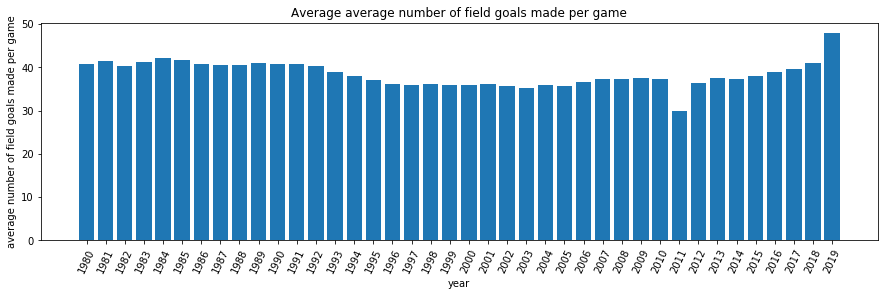

In [158]:
plot_data_for_season(get_per_game_data_for_year('FG'),'average number of field goals made per game')

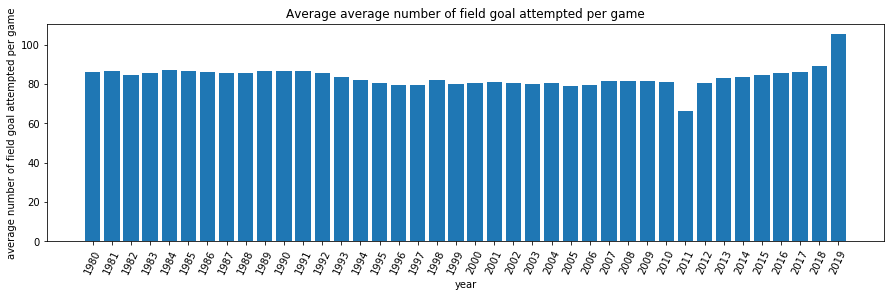

In [159]:
plot_data_for_season(get_per_game_data_for_year('FGA'),'average number of field goal attempted per game')

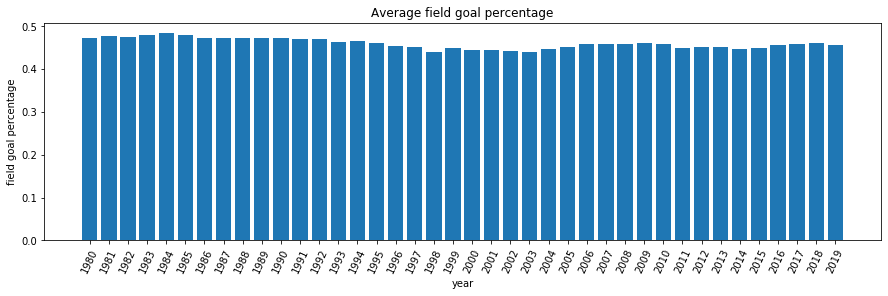

In [160]:
plot_data_for_season(get_game_data_for_year('FG%'),'field goal percentage')

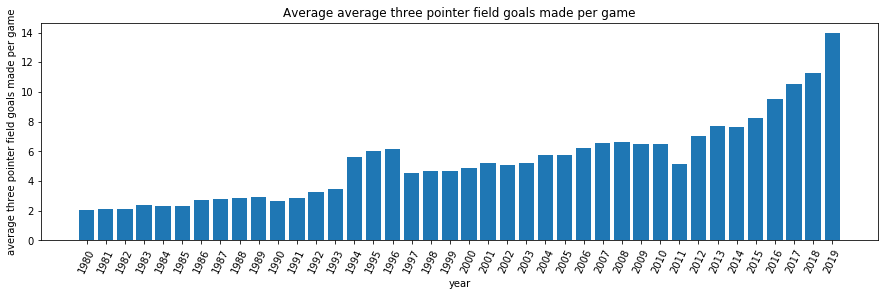

In [161]:
plot_data_for_season(get_per_game_data_for_year('3P'),'average three pointer field goals made per game')

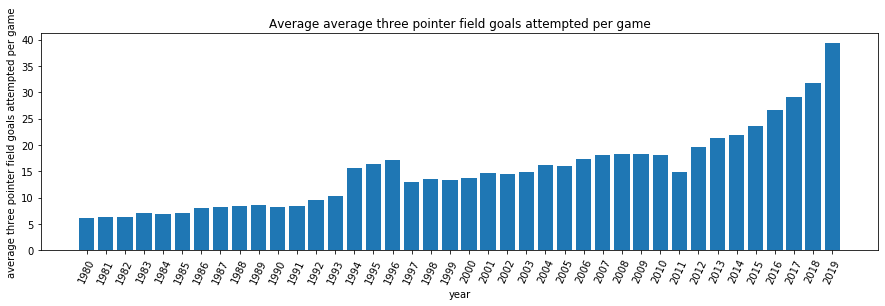

In [162]:
plot_data_for_season(get_per_game_data_for_year('3PA'),'average three pointer field goals attempted per game')

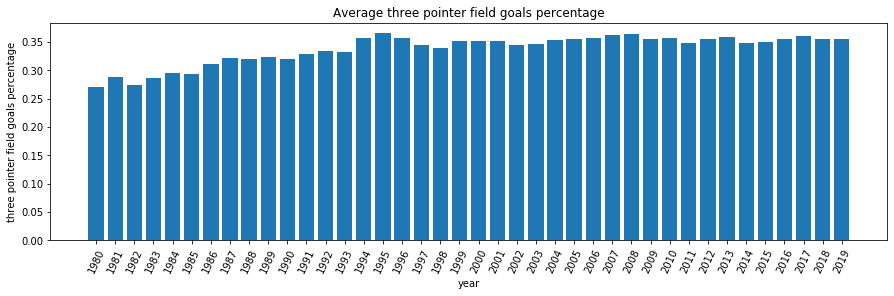

In [163]:
plot_data_for_season(get_game_data_for_year('3P%'),'three pointer field goals percentage')

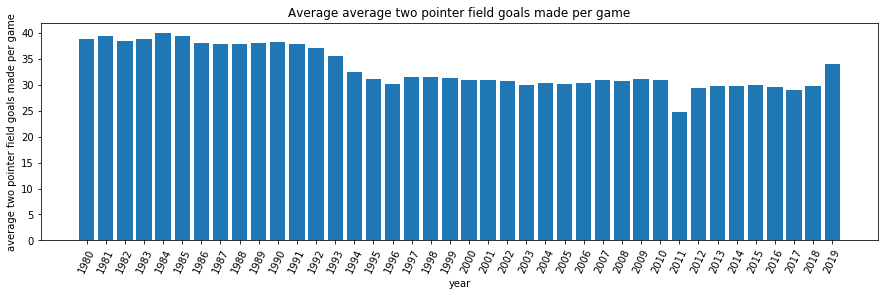

In [164]:
plot_data_for_season(get_per_game_data_for_year('2P'),'average two pointer field goals made per game')

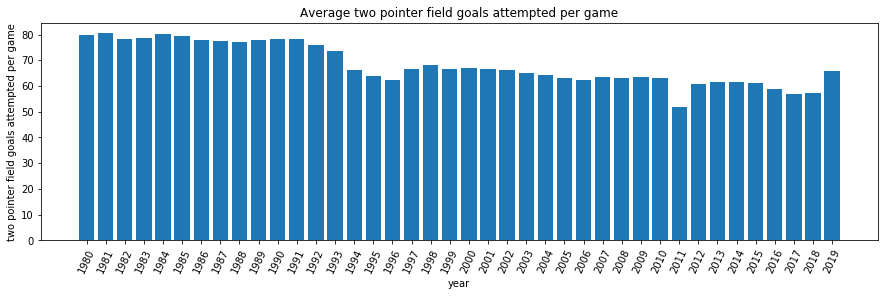

In [165]:
plot_data_for_season(get_per_game_data_for_year('2PA'),'two pointer field goals attempted per game')

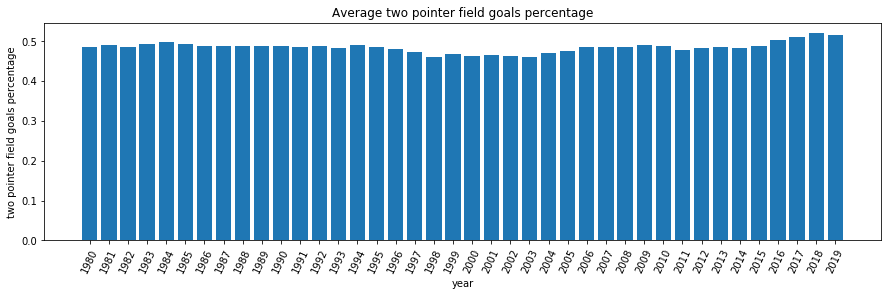

In [166]:
plot_data_for_season(get_game_data_for_year('2P%'),'two pointer field goals percentage')

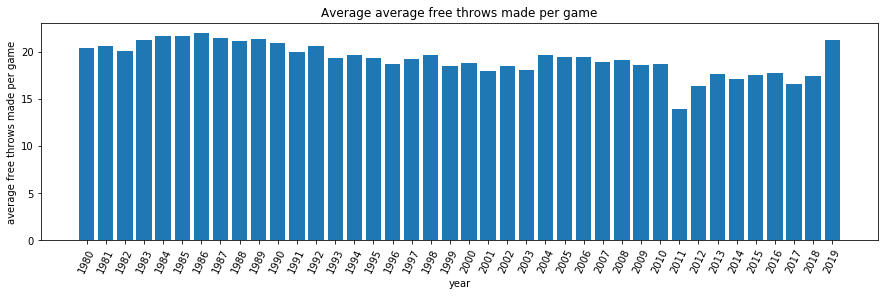

In [167]:
plot_data_for_season(get_per_game_data_for_year('FT'),'average free throws made per game')

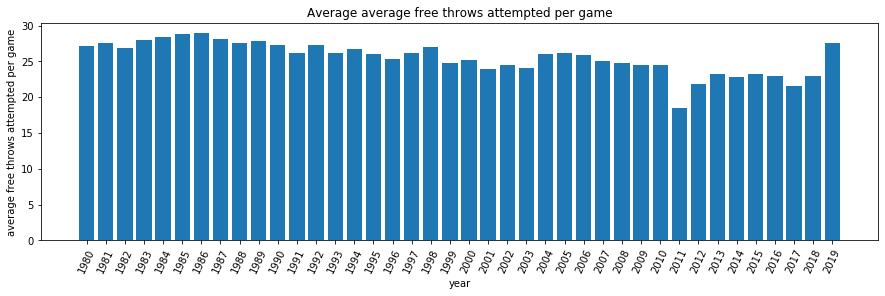

In [168]:
plot_data_for_season(get_per_game_data_for_year('FTA'),'average free throws attempted per game')

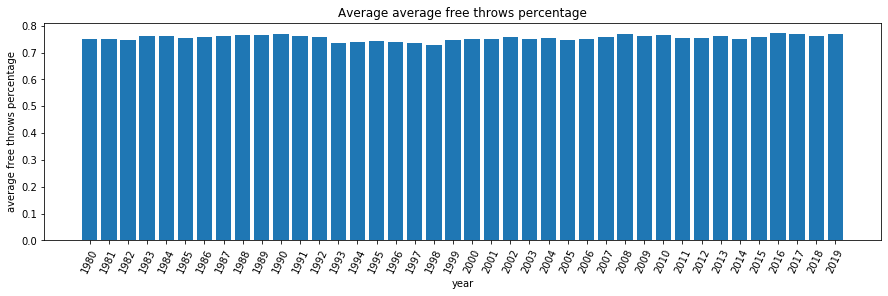

In [169]:
plot_data_for_season(get_game_data_for_year('FT%'),'average free throws percentage')

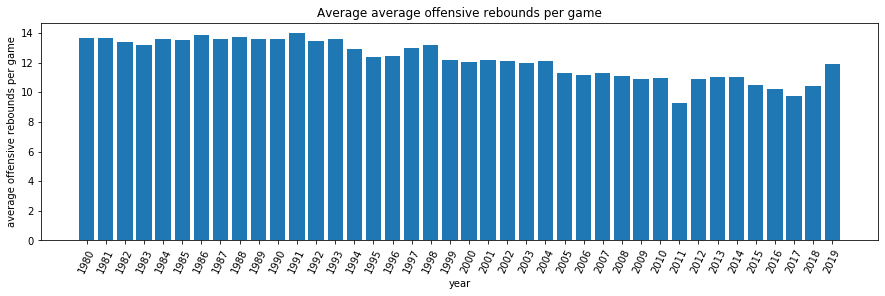

In [170]:
plot_data_for_season(get_per_game_data_for_year('ORB'),'average offensive rebounds per game')

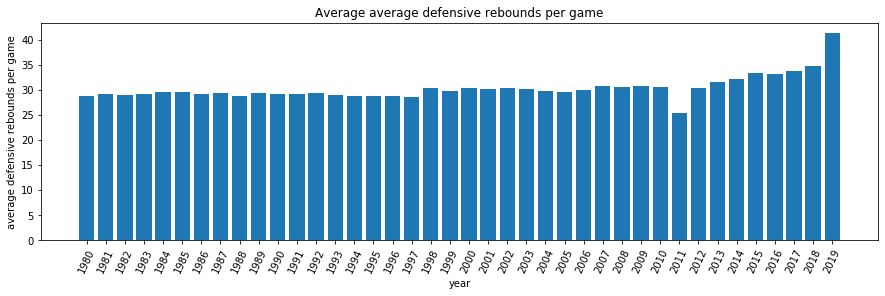

In [171]:
plot_data_for_season(get_per_game_data_for_year('DRB'),'average defensive rebounds per game')

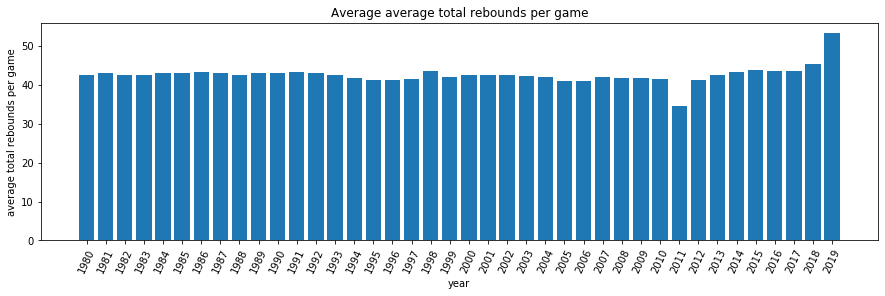

In [172]:
plot_data_for_season(get_per_game_data_for_year('TRB'),'average total rebounds per game')

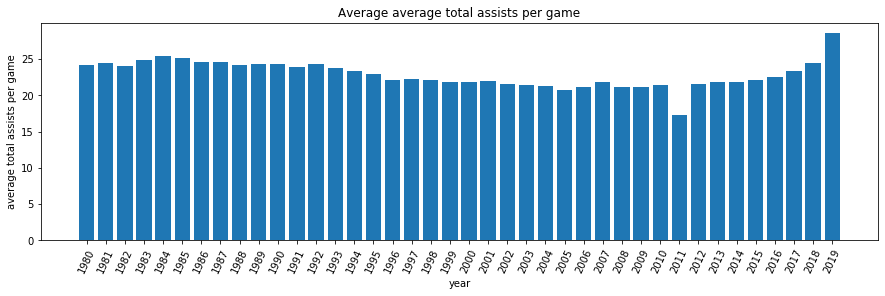

In [173]:
plot_data_for_season(get_per_game_data_for_year('AST'),'average total assists per game')

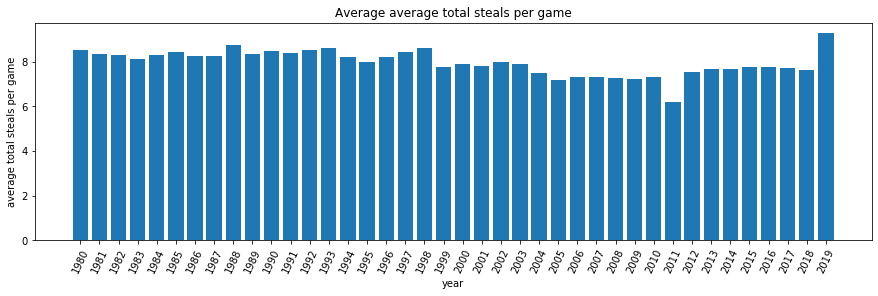

In [174]:
plot_data_for_season(get_per_game_data_for_year('STL'),'average total steals per game')

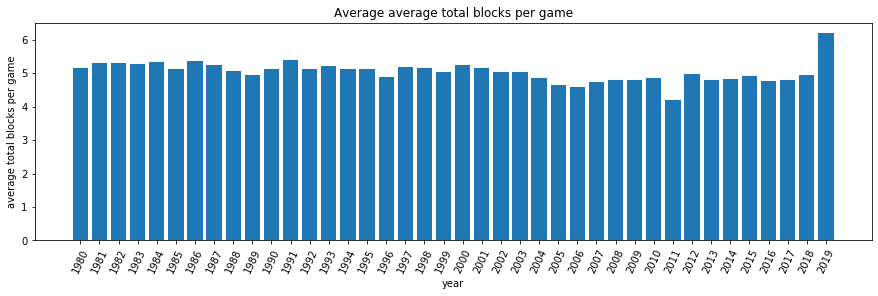

In [175]:
plot_data_for_season(get_per_game_data_for_year('BLK'),'average total blocks per game')

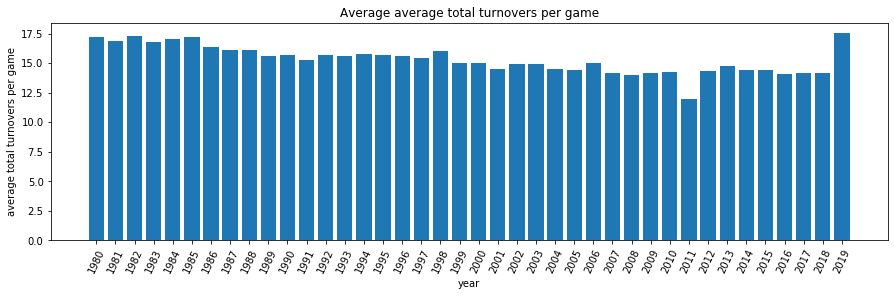

In [176]:
plot_data_for_season(get_per_game_data_for_year('TOV'),'average total turnovers per game')

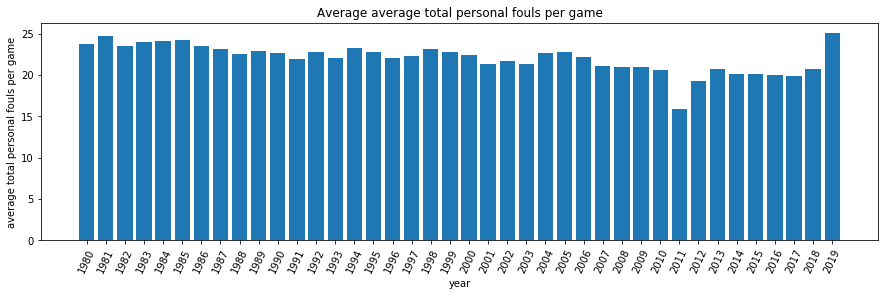

In [177]:
plot_data_for_season(get_per_game_data_for_year('PF'),'average total personal fouls per game')

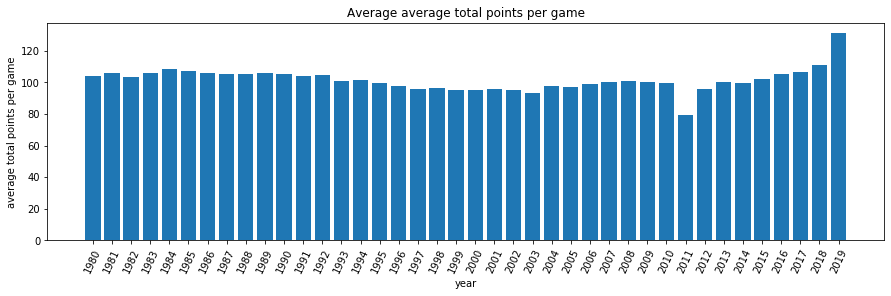

In [178]:
plot_data_for_season(get_per_game_data_for_year('PTS'),'average total points per game')

### Playoffs vs non playoffs data

Dictionary for corresponding teams

In [0]:
team_abr = {}
team_abr["ATL"] = 'Atlanta Hawks'
team_abr["BRK"] = 'Brooklyn Nets'
team_abr["NJN"] = 'New Jersey Nets'
team_abr["BOS"] = 'Boston Celtics'
team_abr["CHA"] = 'Charlotte Hornets'
team_abr["CHH"] = 'Charlotte Hornets'
team_abr["CHO"] = 'Charlotte Hornets'
team_abr["CHI"] = 'Chicago Bulls'
team_abr["CLE"] = 'Cleveland Cavaliers'
team_abr["DAL"] = 'Dallas Mavericks'
team_abr["DEN"] = 'Denver Nuggets'
team_abr["DET"] = 'Detroit Pistons'
team_abr["GSW"] = 'Golden State Warriors'
team_abr["HOU"] = 'Houston Rockets'
team_abr["IND"] = 'Indiana Pacers'
team_abr["LAC"] = 'Los Angeles Clippers'
team_abr["SDC"] = 'San Diego Clippers'
team_abr["LAL"] = 'Los Angeles Lakers'
team_abr["MEM"] = 'Memphis Grizzlies'
team_abr["VAN"] = 'Vancouver Grizzlies'
team_abr["MIA"] = 'Miami Heat'
team_abr["MIL"] = 'Milwaukee Bucks'
team_abr["MIN"] = 'Minnesota Timberwolves'
team_abr["NOP"] = 'New Orleans Pelicans'
team_abr["NOH"] = 'New Orleans Hornets'
team_abr["NOK"] = 'New Orleans/Oklahoma City Hornets'
team_abr["NYK"] = 'New York Knicks'
team_abr["OKC"] = 'Oklahoma City Thunder'
team_abr["SEA"] = 'Seattle Supersonics'
team_abr["ORL"] = 'Orlando Magic'
team_abr["PHI"] = 'Philadelphia 76ers'
team_abr["PHO"] = 'Phoenix Suns'
team_abr["POR"] = 'Portland Trail Blazers'
team_abr["SAC"] = 'Sacramento Kings'
team_abr["KCK"] = 'Kansas City Kings'
team_abr["SAS"] = 'San Antonio Spurs'
team_abr["TOR"] = 'Toronto Raptors'
team_abr["UTA"] = 'Utah Jazz'
team_abr["WAS"] = 'Washington Wizards'
team_abr["WSB"] = 'Washington Bullets'


# team_abr['Atlanta Hawks'] = "ATL"
# team_abr['Brooklyn Nets'] = "BKN"
# team_abr['Boston Celtics']= "BOS"
# team_abr['Charlotte Hornets']= "CHA"
# team_abr['Chicago Bulls']= "CHI"
# team_abr['Cleveland Cavaliers']= "CLE"
# team_abr['Dallas Mavericks']= "DAL"
# team_abr['Denver Nuggets']= "DEN"
# team_abr['Detroit Pistons']= "DET"
# team_abr['Golden State Warriors']= "GSW"
# team_abr['Houston Rockets']= "HOU"
# team_abr['Indiana Pacers']= "IND"
# team_abr['Los Angeles Clippers']= "LAC"
# team_abr['Los Angeles Lakers']= "LAL"
# team_abr['Memphis Grizzlies']= "MEM"
# team_abr['Miami Heat']= "MIA"
# team_abr['Milwaukee Bucks']= "MIL"
# team_abr['Minnesota Timberwolves']= "MIN"
# team_abr['New Orleans Pelicans']= "NOP"
# team_abr['New York Knicks']= "NYK"
# team_abr['Oklahoma City Thunder']= "OKC"
# team_abr['Orlando Magic']= "ORL"
# team_abr['Philadelphia 76ers']= "PHI"
# team_abr['Phoenix Suns']= "PHX"
# team_abr['Portland Trail Blazers']= "POR"
# team_abr['Sacramento Kings']= "SAC"
# team_abr['San Antonio Spurs']= "SAS"
# team_abr['Toronto Raptors']= "TOR"
# team_abr['Utah Jazz']= "UTA"
# team_abr['Washington Wizards']= "WAS"

In [0]:
def get_playoff_teams_by_year(year):
  for file in os.listdir("/content/drive/My Drive/NBA Predictions/NBA Playoffs Data/Playoff Teams By Year"):
    if file.find(str(year)) != -1:
      playoffTeams = pd.read_csv("/content/drive/My Drive/NBA Predictions/NBA Playoffs Data/Playoff Teams By Year/" + file, header=None, usecols=[1])
      playoffTeams = list(playoffTeams.iloc[:,0])
      break
  return playoffTeams
   
    
   

Make a dict with playoff teams <br>
NOTE: will go from 1981 to 2019 since 1981 corresponds to the 1980-1981 season


In [0]:
playoff_teams = {}
for year in range(1981,2020):
  playoff_teams[year] = get_playoff_teams_by_year(year)
  

In [0]:
#print(playoff_teams.keys())

In [183]:
print(playoff_teams[1981])

['Houston Rockets', 'Boston Celtics', 'Philadelphia 76ers', 'Kansas City Kings', 'San Antonio Spurs', 'Milwaukee Bucks', 'Phoenix Suns', 'Chicago Bulls', 'Portland Trail Blazers', 'Los Angeles Lakers', 'New York Knicks', 'Indiana Pacers']


In [0]:
def playoff_vs_nonplayoff_data(playoff_teams):
  playoff = {}
  non_playoff = {}
  for year in playoff_teams.keys():      
    #print(year)
    playoff[year] = pd.DataFrame()
    non_playoff[year] = pd.DataFrame()
    for file in os.listdir("/content/drive/My Drive/NBA Predictions/NBA Year Data/" + str(year-1) + '-' + str(year)):
      if file.find('team_and_opponent') != -1:
        team = file[0:3]
        if team_abr[team] in playoff_teams[year]:   
          #print('yes', team, file)
          dat_csv = pd.read_csv("/content/drive/My Drive/NBA Predictions/NBA Year Data/" + str(year-1) + '-' + str(year) + '/' + file)
          dat_csv = dat_csv.iloc[::8,3:].astype('float').mean()
          playoff[year] = playoff[year].append(dat_csv, ignore_index=True)
          #playoff['team']
        else:
          dat_csv = pd.read_csv("/content/drive/My Drive/NBA Predictions/NBA Year Data/" + str(year-1) + '-' + str(year) + '/' + file)
          dat_csv = dat_csv.iloc[::8,3:].astype('float').mean()
          non_playoff[year] = non_playoff[year].append(dat_csv, ignore_index=True)
    #print(playoff)
  return playoff, non_playoff
        
        
        

In [0]:
playoff, non_playoff = playoff_vs_nonplayoff_data(playoff_teams)

In [186]:
print(playoff.get(1981).columns)
print(len(playoff.get(1981).columns))


Index(['2P', '2P%', '2PA', '3P', '3P%', '3PA', 'AST', 'BLK', 'DRB', 'FG',
       'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'MP', 'ORB', 'PF', 'PTS', 'STL',
       'TOV', 'TRB'],
      dtype='object')
22


In [0]:
stats_list = playoff.get(1981).columns

Now get all the stats for playoffs vs non playoff teams<br>
Reminder: team_and_opponent_(year).iloc[0,1] will get us the total number of games for that year

In [0]:
#NOTE: adjust years-1 for playoffs
# def get_games_for_year(year):
#   temp = build_stats_for_year(year)[0]
#   return temp.iloc[0,1]

# games_for_year = []
# for i in range(1980, 2019):
#   games_for_year.append(get_games_for_year(i))
# games_for_year

# results show...

games_for_year = []
for i in range(1980, 2019):
  if i == 2012:
    games_for_year.append(66.0)
  else:
    games_for_year.append(82.0)

#games_for_year


In [0]:
#average stats for nonplayoff teams
def build_nonplayoff_stats(year,stat):
  if stat == 'FG%' or stat == '3P%' or stat == '2P%' or stat == 'eFG%' or stat == 'FT%':
    avg_stat = non_playoff[year][stat]
  else:
    avg_stat = non_playoff[year][stat]/games_for_year[year - 1981]
  return avg_stat
  
#average stats for playoff teams
def build_playoff_stats(year,stat):
  if stat == 'FG%' or stat == '3P%' or stat == '2P%' or stat == 'eFG%' or stat == 'FT%':
    avg_stat = playoff[year][stat]
  else:
    avg_stat = playoff[year][stat]/games_for_year[year - 1981]
  return avg_stat  

In [0]:
#print(playoff.get(1981).columns[5:])
def playoff_stats():
  nonplayoff_avg = {}
  playoff_avg = {}
  for year in range(1981, 2020):
    nonplayoff_avg[year] = {}
    playoff_avg[year] = {}
    for stat in playoff.get(year).columns:
      nonplayoff_avg[year][stat] = np.mean(build_nonplayoff_stats(year, stat))
      playoff_avg[year][stat] = np.mean(build_playoff_stats(year, stat))
  return playoff_avg, nonplayoff_avg

In [0]:
playoff_avg, nonplayoff_avg = playoff_stats()

In [192]:
print(playoff_avg)
print(len(playoff_avg.keys()))
print(len(playoff_avg[1981].keys()))

{1981: {'2P': 43.512195121951216, '2P%': 0.5024166666666666, '2PA': 86.6239837398374, '3P': 0.4065040650406504, '3P%': 0.21375, '3PA': 1.8434959349593496, 'AST': 26.536585365853657, 'BLK': 5.98780487804878, 'DRB': 29.618902439024392, 'FG': 43.91869918699188, 'FG%': 0.4965, 'FGA': 88.46747967479673, 'FT': 21.639227642276424, 'FT%': 0.7475833333333334, 'FTA': 28.91869918699187, 'MP': 241.44817073170736, 'ORB': 14.629065040650408, 'PF': 24.71747967479675, 'PTS': 109.8831300813008, 'STL': 9.539634146341465, 'TOV': 19.028455284552845, 'TRB': 44.24796747967479}, 1982: {'2P': 43.21849593495934, '2P%': 0.49991666666666673, '2PA': 86.41971544715447, '3P': 0.5233739837398376, '3P%': 0.253, '3PA': 2.0274390243902443, 'AST': 26.122967479674795, 'BLK': 5.859756097560976, 'DRB': 29.871951219512194, 'FG': 43.74186991869919, 'FG%': 0.49433333333333335, 'FGA': 88.4471544715447, 'FT': 21.671747967479675, 'FT%': 0.7520000000000001, 'FTA': 28.78150406504065, 'MP': 241.67682926829266, 'ORB': 14.34552845528

In [0]:
def plot_playoff_vs_non_playoff_avg(year):
  plt.figure(figsize=(23,21))
  for i in range(0, 22):
      plt.subplot(4, 6, i + 1)
      stat = list(playoff_avg[year].keys())[i]
      performance = [playoff_avg[year][stat], nonplayoff_avg[year][stat]]
      plt.bar(['Playoff Teams', 'Nonplayoff Teams'], performance, align='center', alpha=0.5)
      plt.xticks(['Playoff Teams', 'Nonplayoff Teams'])
      plt.ylabel('per game value')
      plt.title(str(year) +" " +  stat)
    


In [217]:
for year in range(1981, 2020):
  plot_playoff_vs_non_playoff_avg(year)

Output hidden; open in https://colab.research.google.com to view.

Now let's see the trends by finding +/- for each stat throughout the years, and total

In [0]:
avg_diff = {}
for year in playoff_avg.keys():
  avg_diff[year] = []
  for stat in playoff_avg[year]:
    avg_diff[year].append(playoff_avg[year][stat] - nonplayoff_avg[year][stat])

In [196]:
print(avg_diff)

{1981: [6.9127579737335765, 0.025224358974358874, 10.002970606629162, -2.3904002501563486, -0.08351923076923073, -6.378361475922453, 3.388367729831142, 1.2265478424015006, 1.2005159474671707, 4.522357723577237, 0.032999999999999974, 3.6246091307066735, 1.7977642276422792, -0.0035705128205129055, 2.5617573483427094, 3.537757973733676, 1.373436522826772, 1.4130706691682278, 8.452079424640402, 1.448170731707318, 2.6485303314571595, 2.573952470293932], 1982: [5.508364602876796, 0.0149166666666668, 8.745231394621655, -2.3077704815509694, -0.05157692307692319, -6.337476547842401, 2.457864290181366, 0.8072232645403377, 0.8968105065666059, 3.200594121325828, 0.02360256410256406, 2.407754846779227, 1.4358192620387733, 0.0017692307692308562, 1.8035490931832356, -0.05863039399622494, 1.0078173858661632, 1.5507348342714131, 5.529237023139487, 0.6035021888680401, 1.120622263914946, 1.904627892432785], 1983: [7.451610381488422, 0.018301282051282064, 12.351078799249521, -2.409709193245779, -0.0793910

In [197]:
print(len(avg_diff[1981]))
print(len(playoff_avg.keys()))

22
39


In [0]:
def plot_playoff_vs_non_playoff_pm(year):
  plt.figure(figsize=(12,3))
  stat = avg_diff[year]
  performance = avg_diff[year]
  plt.ylim(-15, 15)
  plt.bar(stats_list,performance, align='center', alpha=1,color='orange')
  for index, value in enumerate(performance):
    if value >= 0:
      plt.text(index - 0.5 ,value + 0.1, str('+' + format(value, '0.3f')), color='black', fontweight='bold',fontsize=8)
    else:
      plt.text(index - 0.5 ,value - 0.5, str(format(value, '0.3f')), color='black', fontweight='bold',fontsize=8)

  plt.ylabel('per game value')
  plt.title(str(year) + " playoff vs non-playoff avgs ")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


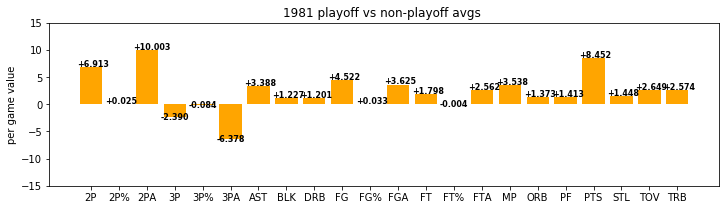

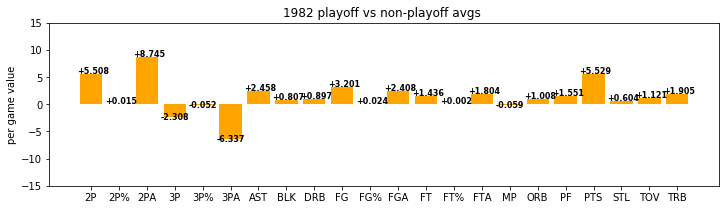

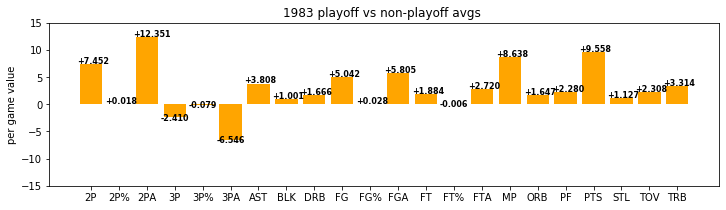

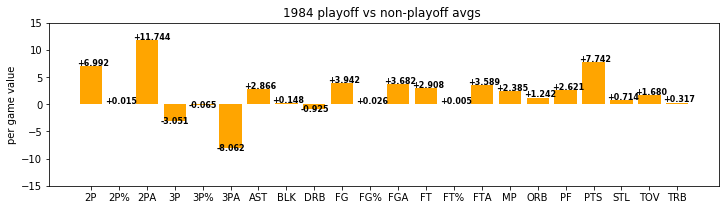

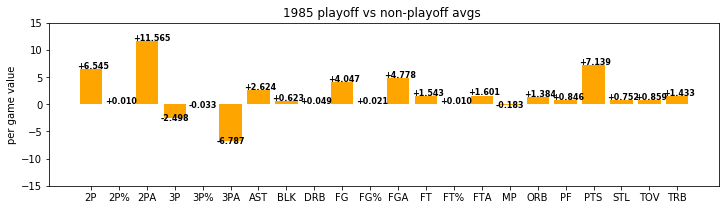

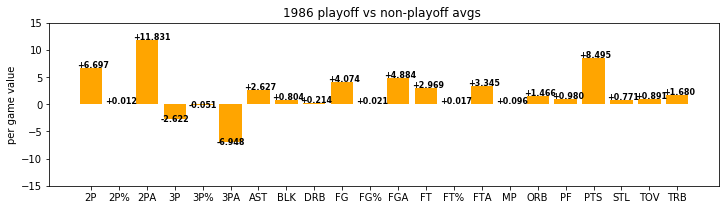

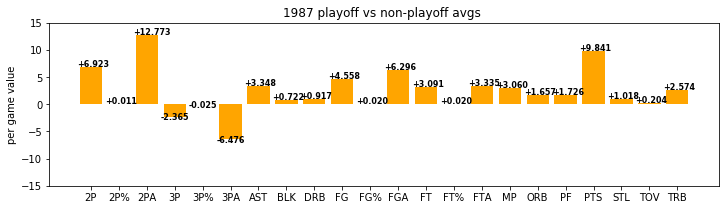

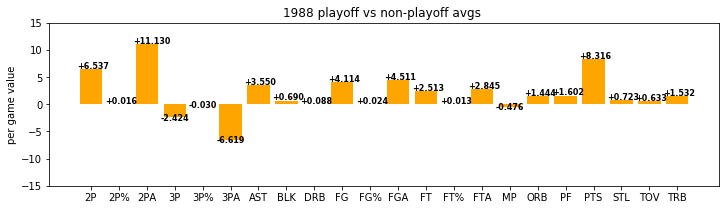

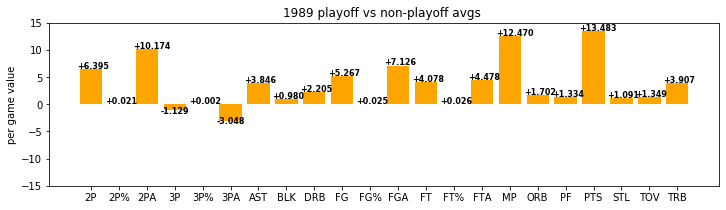

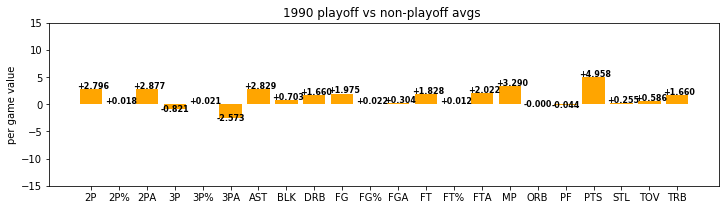

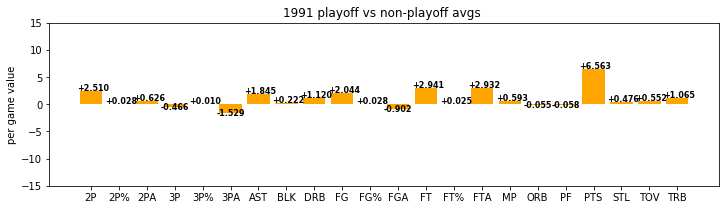

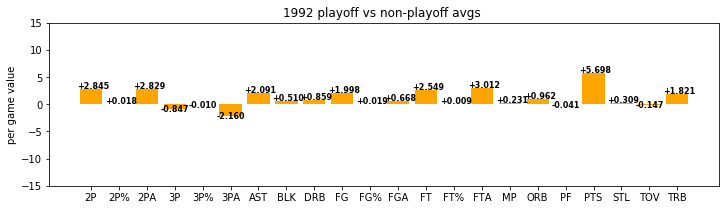

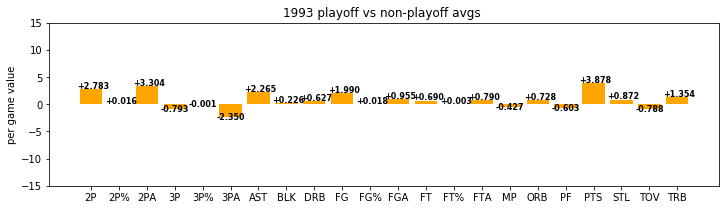

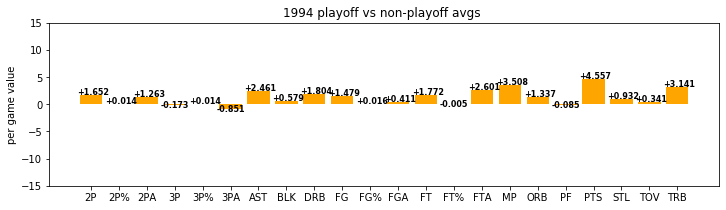

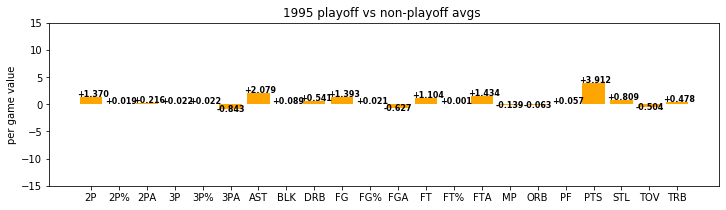

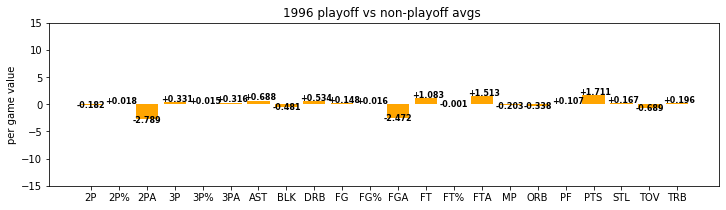

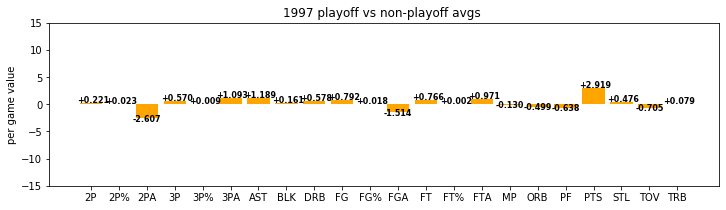

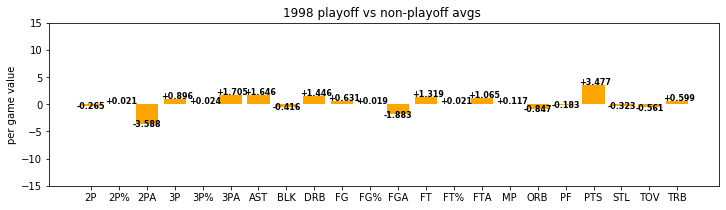

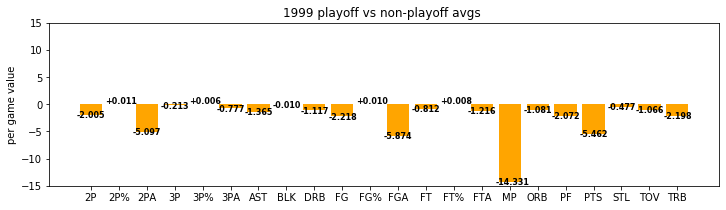

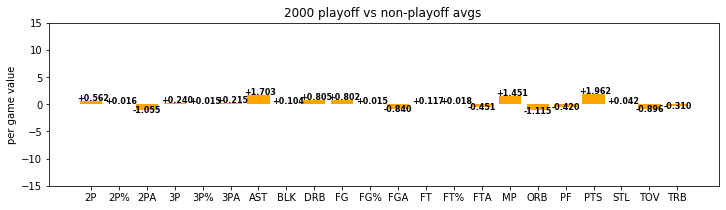

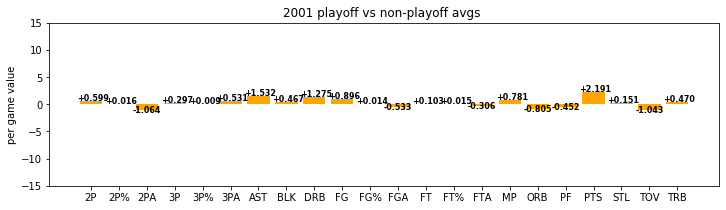

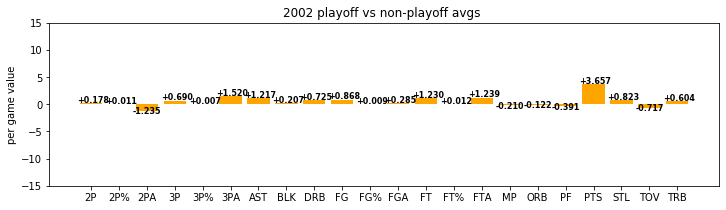

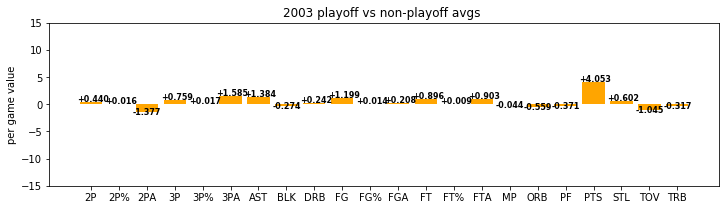

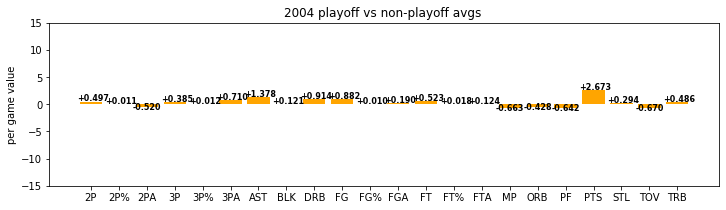

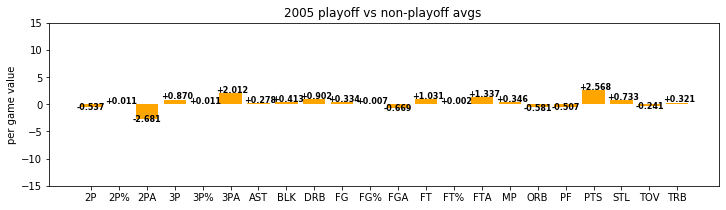

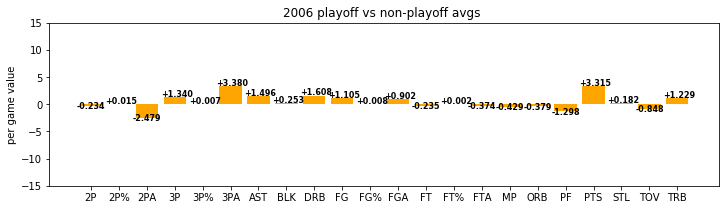

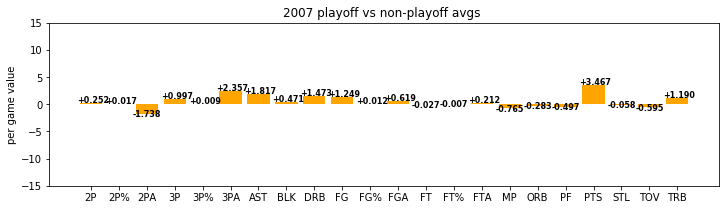

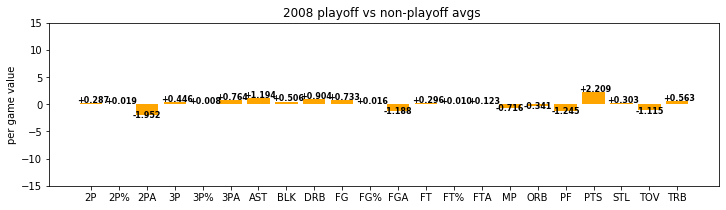

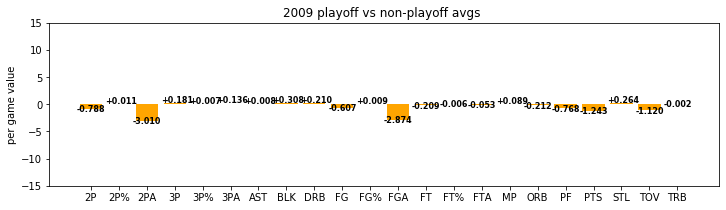

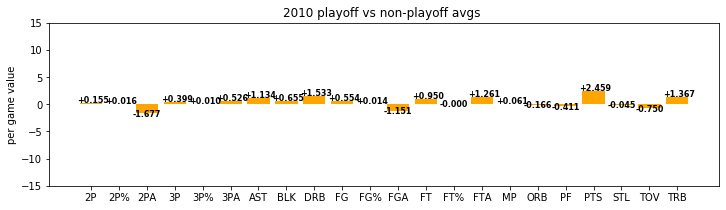

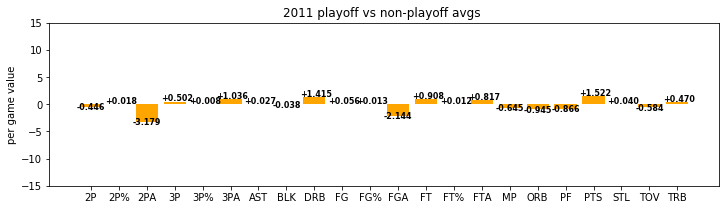

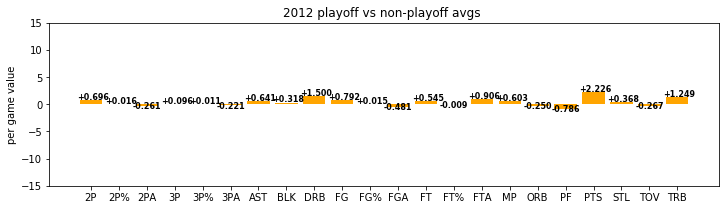

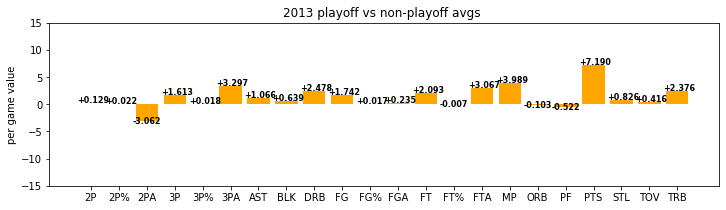

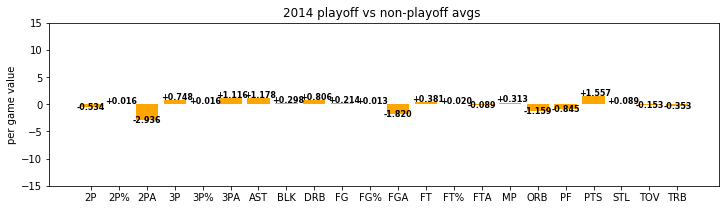

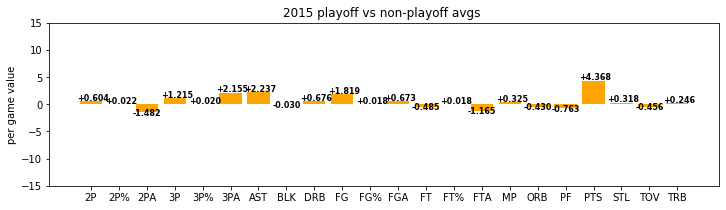

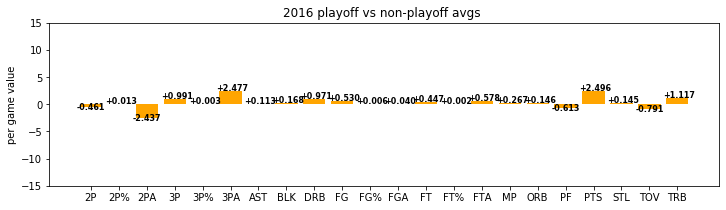

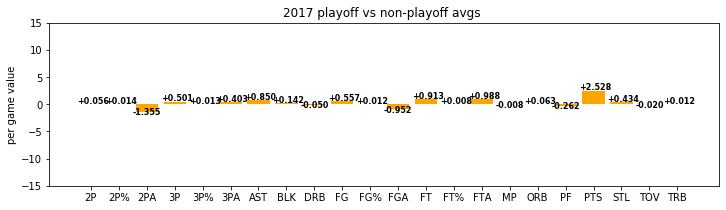

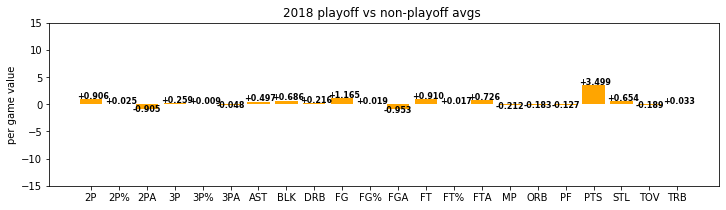

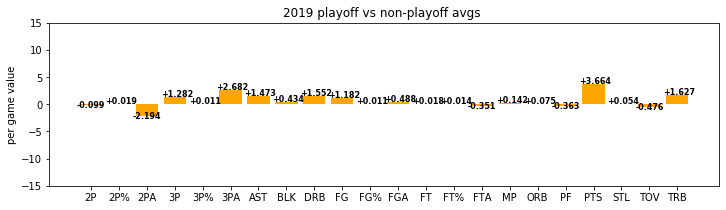

In [215]:
for year in range(1981, 2020):
  plot_playoff_vs_non_playoff_pm(year)

There does not seem to be any much correlation with numbers teams put up and whether they make it to the playoffs or not

In [0]:
def write_yearly_team_data_into_csv(team, year, df_name, df_list):
  save_path = "/content/drive/My Drive/NBA Predictions/NBA Team Data/" + team + "/"
  for i in range (len(df_list)):
    df_list[i].to_csv(path_or_buf=save_path + df_name + '_' +  str(year) + '.csv') 
    year += 1